In [37]:
from PIL import Image, ImageDraw

def process_image(image):
    draw = ImageDraw.Draw(image)

    width = image.size[0]
    length = image.size[1]
    pixels = image.load()

    for i in range(width):
        for j in range(length):
            v = (pixels[i, j][0] + pixels[i, j][1] + pixels[i, j][2]) // 3 
            draw.point((i, j), (v, v, v))

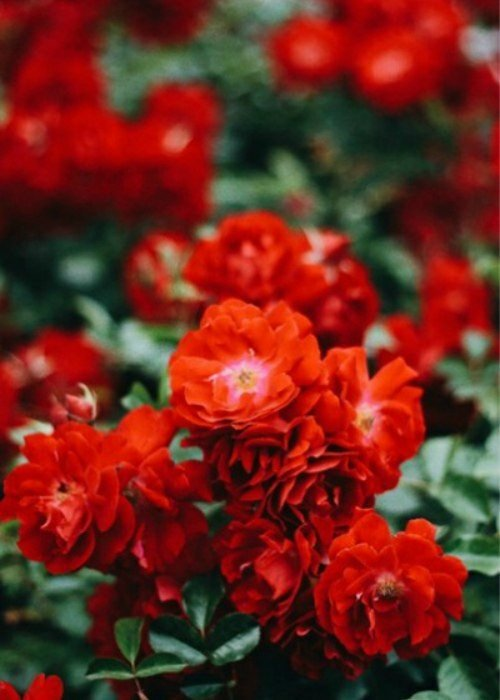

In [38]:
image_1 = Image.open("E:\image.jpg")
image_1

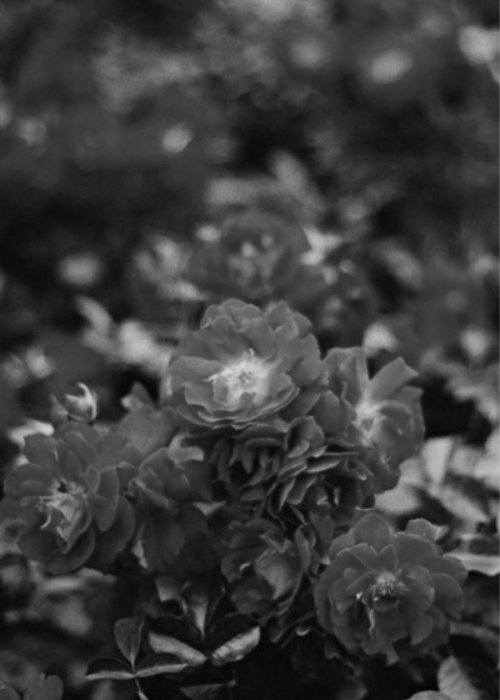

In [39]:
process_image(image_1)        
image_1

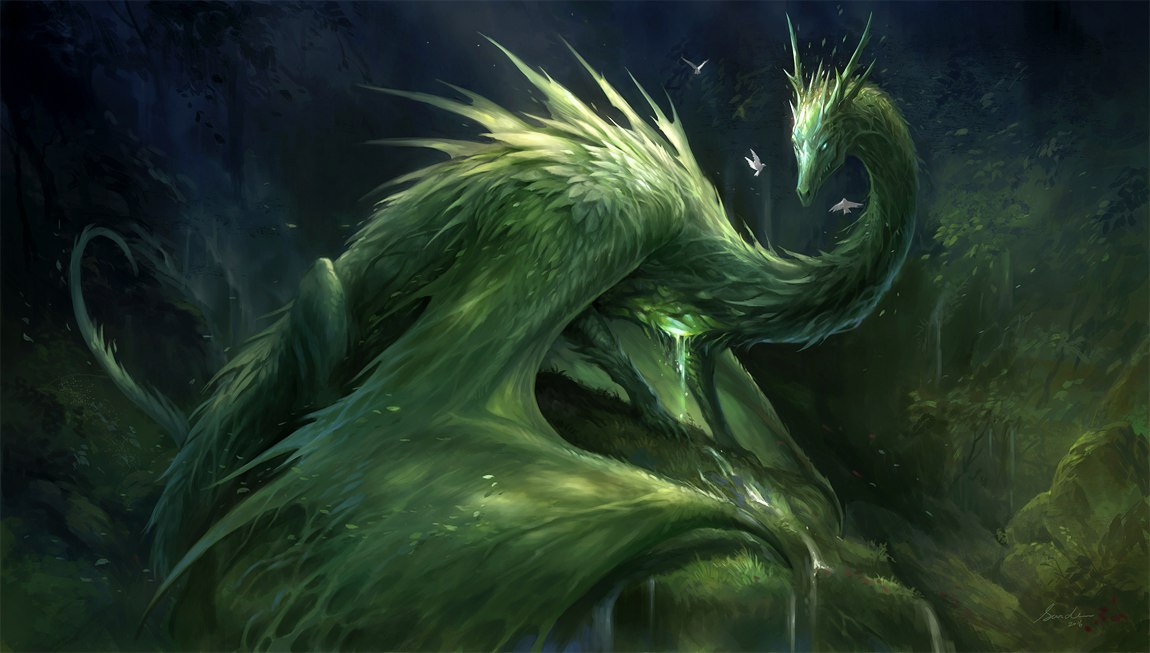

In [40]:
image_2 = Image.open("E:\image2.jpg")
image_2

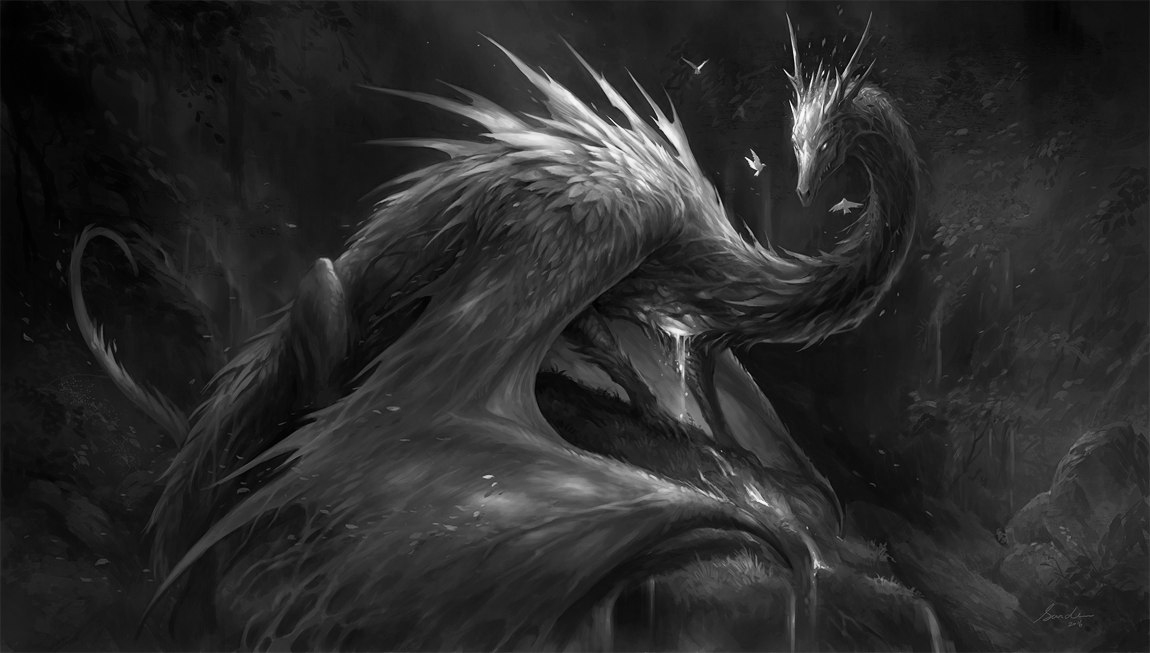

In [41]:
process_image(image_2)        
image_2

(array([267481., 284282., 143337.,  22102.,  14621.,   6032.,   6489.,
          2798.,   2608.,   1200.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Patch objects>)

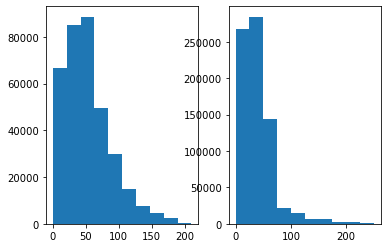

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def get_pixels(image):
    p = []
    pixels = image.load()

    for i in range(image.size[0]):
        for j in range(image.size[1]):
            p.append(pixels[i, j][0]) 
            
    return p

p_1 = get_pixels(image_1)
p_2 = get_pixels(image_2)

h_1 = []
h_2 = []

for i in range(len(p_1)):
    h_1.append(p_1[i] - p_1[i] % 10)
for i in range(len(p_2)):
    h_2.append(p_2[i] - p_2[i] % 10)

fig, axs = plt.subplots(1, 2)
axs[0].hist(h_1)
axs[1].hist(h_2)

In [79]:
import statistics

print(np.average(h_1), np.average(h_2))
print(statistics.pvariance(h_1), statistics.pvariance(h_2))
print(statistics.mode(h_1), statistics.mode(h_2))
print(statistics.median(h_1), statistics.median(h_2))

55.10542857142857 37.694120780344896
1146.2568848163264 897.2167781386847
50 30
50.0 30.0


In [85]:
def rxy(x, y):
    av_x = np.average(x)
    av_y = np.average(y)
    xy = 0
    x2 = 0
    y2 = 0
    for i in range(len(x)):
        xy += ((x[i]-av_x)*(y[i]-av_y))
        x2 += ((x[i]-av_x)**2)
        y2 += ((y[i]-av_y)**2)
    
    return(xy / ((x2 * y2) ** 0.5))

print(rxy(p_1, p_2))
print(rxy(h_1, h_2))

0.06815859303117645
0.06769885191613838


In [81]:
import scipy.stats as sp

print(sp.normaltest(p_1)[1] <= 0.05)
print(sp.normaltest(p_2)[1] <= 0.05)

True
True
